# EDA REPORT ON COVID-19 FOR INDIA
**CONTEXT**
Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization

The number of new cases are increasing day by day around the world. This dataset has information from the states and union territories of India at daily level.

State level data comes from Ministry of Health & Family Welfare

Testing data and vaccination data comes from covid19india. Huge thanks to them for their efforts!

Update on April 20, 2021: Thanks to the Team at ISIBang, I was able to get the historical data for the periods that I missed to collect and updated the csv file.

**CONTENT**
COVID-19 cases at daily level is present in covid_19_india.csv file

Statewise testing details in StatewiseTestingDetails.csv file

**INSPIRATION**
Looking for data based suggestions to stop / delay the spread of virus

In [35]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Importing covid-19 data

In [4]:
df_india = pd.read_csv('covid_19_india.csv')
df_india.info()
df_india.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16850 non-null  int64 
 1   Date                      16850 non-null  object
 2   Time                      16850 non-null  object
 3   State/UnionTerritory      16850 non-null  object
 4   ConfirmedIndianNational   16850 non-null  object
 5   ConfirmedForeignNational  16850 non-null  object
 6   Cured                     16850 non-null  int64 
 7   Deaths                    16850 non-null  int64 
 8   Confirmed                 16850 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [5]:
df_state = pd.read_csv('StatewiseTestingDetails.csv')
df_state.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


# Total covid-19 confirmed cases in India

In [9]:
toal_confirmed_cases = df_india['Confirmed'].max()
toal_confirmed_cases

6113335

# Total Deaths according to data

In [11]:
total_deaths = df_india['Deaths'].max()
total_deaths

123531

# Active cases

In [13]:
df_india['Active'] = df_india ['Confirmed'] - df_india['Cured'] - df_india['Deaths']
df_india.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
16845,16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282,11455
16846,16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612,3947
16847,16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882,1538
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818,2032
16849,16850,2021-07-07,8:00 AM,West Bengal,-,-,1472132,17834,1507241,17275


In [15]:
df_india['Active'].max()

701614

# Recovered cases

In [14]:
df_recovered = df_india['Cured'].max()
df_recovered

5872268

# Statewise Positive results

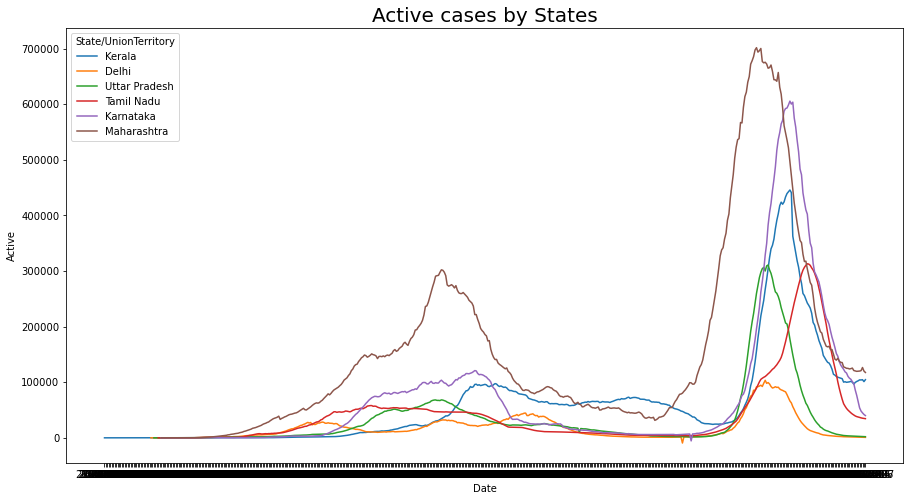

In [24]:
fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=df_india[df_india['State/UnionTerritory'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra','Uttar Pradesh','Karnataka'])],x='Date',y='Active',hue='State/UnionTerritory')
ax.set_title("Active cases by States", size=20)
plt.show()

In [30]:
vaccination = pd.read_csv("covid_vaccine_statewise.csv")
vaccination.head(20)


,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,132784.0,233143.0,38.0,5367.0,360598.0,NaN,NaN,NaN,NaN,NaN,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,193899.0,355402.0,80.0,8128.0,541253.0,NaN,NaN,NaN,NaN,NaN,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,267856.0,491049.0,103.0,11192.0,747816.0,NaN,NaN,NaN,NaN,NaN,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,296283.0,538647.0,128.0,13156.0,821902.0,NaN,NaN,NaN,NaN,NaN,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,444137.0,832766.0,201.0,18858.0,1258246.0,NaN,NaN,NaN,NaN,NaN,1277104.0


# Vaccines Administered till now

In [31]:
total_vaccine = vaccination['Total Doses Administered'].max()
total_vaccine

356192949.0

# Vaccinated People or Doses used

In [32]:
vaccinated = vaccination['Total Individuals Vaccinated'].max()
vaccinated

290132865.0

# Ratio of male, female and transgender vaccinated people

In [37]:
male = vaccination["Male(Individuals Vaccinated)"].sum() 
female = vaccination["Female(Individuals Vaccinated)"].sum()  
trans = vaccination["Transgender(Individuals Vaccinated)"].sum()


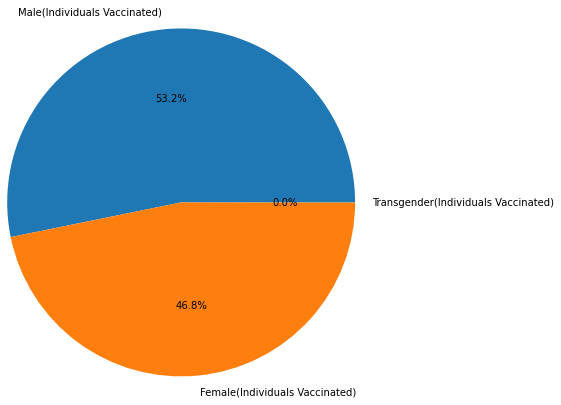

In [40]:
exp_values = [male,female,trans]
exp_lables = ["Male(Individuals Vaccinated)","Female(Individuals Vaccinated)","Transgender(Individuals Vaccinated)"]
plt.axis("equal")
plt.pie(exp_values,labels=exp_lables,radius=2,autopct='%0.1f%%')
plt.show()

# Different vaccines avaliable in india and vaaccinated

In [41]:
covaxine = vaccination['Total Covaxin Administered'].sum()
covidshield = vaccination['Total CoviShield Administered'].sum()

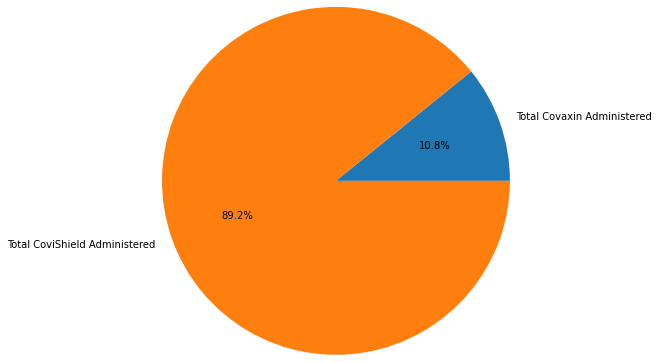

In [42]:
val = [covaxine,covidshield]
val2 = ["Total Covaxin Administered","Total CoviShield Administered"]
plt.pie(val,labels=val2,radius=2,autopct='%0.1f%%')
plt.show()

# End of COVID-19 analyis report 
** Thank you**